## Clustering Iris

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# feature name 간략화 (cm) 자르기

cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [4]:
# iris 데이터 정리

iris_df = pd.DataFrame(data=iris.data, columns = cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# 두 개의 특성만 test

feature = iris_df[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
# clustering

model = KMeans(n_clusters=3) # as iris data has 3 groups of iris species

model.fit(feature)

c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

* parameters
  - n_clusters = 군집화 갯수
  - init = 초기 군집 중심점의 좌표 설정하는 방식 결정
  - max_iter = 최대 반복 횟수 결정

In [7]:
# 결과 label >> 군집 중심들의 number 이며, 비지도학습이기 때문에 넘버링이 따로 특정한 species를 의미하지 않음

model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# 군집 중심값

model.cluster_centers_

array([[1.462     , 0.246     ],
       [4.26923077, 1.34230769],
       [5.59583333, 2.0375    ]])

In [9]:
# plotting 위한 정리

predict = pd.DataFrame(model.predict(feature), columns= ['cluster'])
feature = pd.concat([feature, predict], axis = 1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


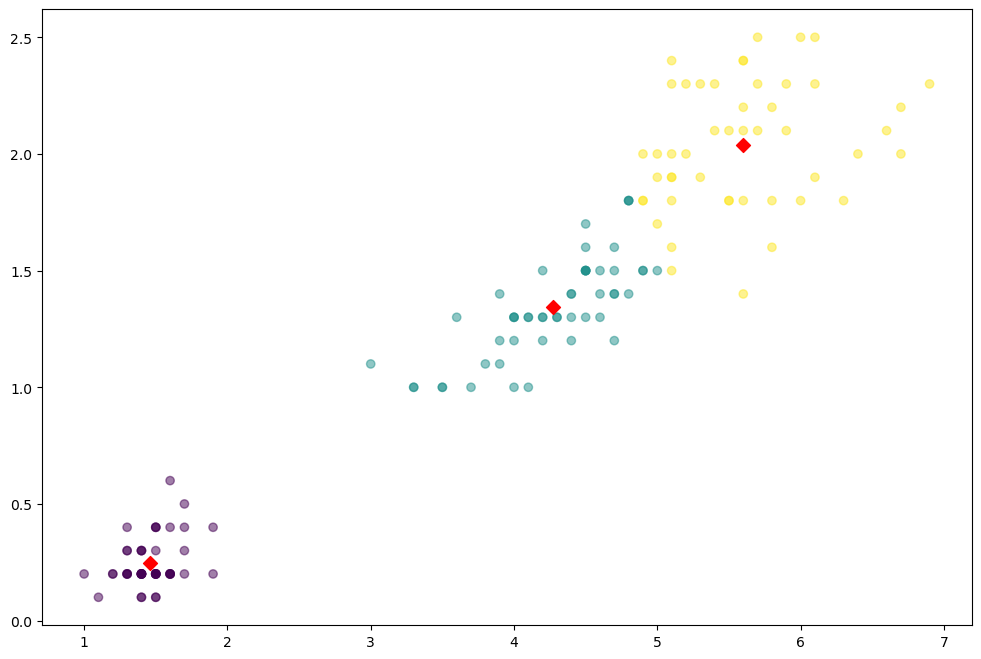

In [10]:
# plotting

centers = pd.DataFrame(model.cluster_centers_,
                       columns=['petal length', 'petal width'])

center_x = centers['petal length']
center_y = centers['petal width']

plt.figure(figsize=(12, 8))
plt.scatter(feature['petal length'], feature['petal width'], c=feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

### make_blobs

* 군집화 연습을 위한 데이터 생성기

In [11]:
# make_blobs를 활용한 데이터 생성

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [12]:
# 데이터 정리

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [13]:
# 군집화

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 200, random_state=13)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


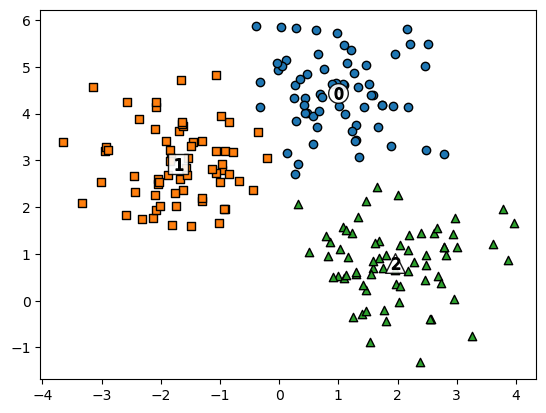

In [14]:
# 도식화

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k',  # 군집에 따른 데이터를 보이는 그래프
                marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9,  # 군집 중심을 보이려는 그래프
                edgecolors='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',  # 군집 label 숫자 넣기 위한 그래프
                edgecolors='k', marker='$%d$' % label)

plt.show()

In [15]:
# 군집 결과 확인

print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


## Iris silhouette plot

In [16]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

iris = load_iris()

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data, columns= feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)

c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
# 군집 결과 정리

iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [18]:
# 군집 평가를 위한 작업

from sklearn.metrics import silhouette_samples, silhouette_score

avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_values = silhouette_samples(iris.data, iris_df['cluster'])

print('avg_value: ', avg_value)
print('silhouette_samples() return 값의 shape ', score_values.shape)

avg_value:  0.5528190123564093
silhouette_samples() return 값의 shape  (150,)


In [19]:
# !pip install yellowbrick

c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


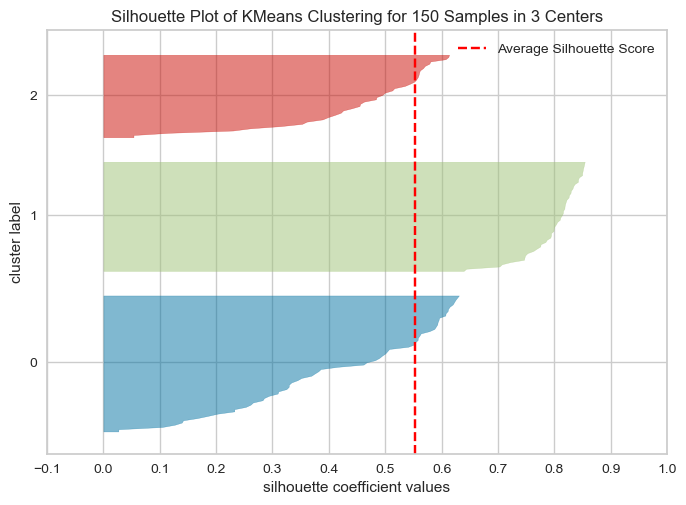

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=0))

In [20]:
# 실루엣 plot 결과 확인

from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(kmeans, iris.data, colors='yellowbrick')

## 이미지 분할

* image segmentation: 이미지를 여러 개로 분할 하는 것
* sementic segmentation: 동일 종류의 물체에 속한 픽셀을 같은 세그먼트로 할당 (CNN 기반이 좋은 성능을 보임)
  - 지금은 단순 색상 분할 시도

In [21]:
# 이미지 불러오기

from matplotlib.image import imread
image = imread('./ladybug.jpg')
image.shape

(407, 612, 3)

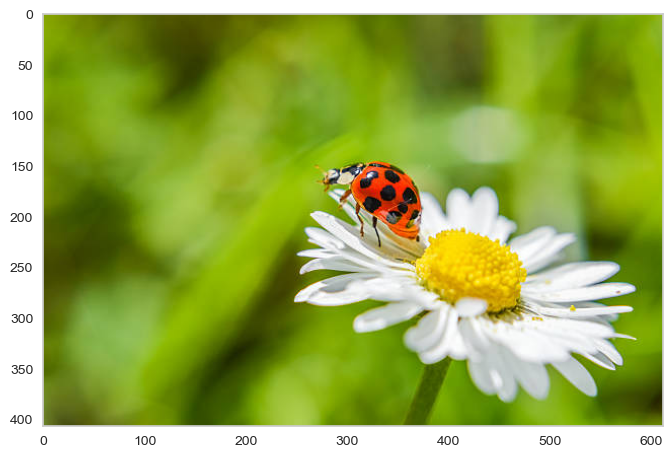

In [22]:
# 이미지 보이기

plt.grid(False)
plt.imshow(image);

In [23]:
# 색상별 clustering

from sklearn.cluster import KMeans

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=13).fit(X) # 위 사진의 색상을 8가지로 나누어 군집
segmented_img = kmeans.cluster_centers_[kmeans.labels_] # 가장 많이 사용된 8가지 색상으로 변경
segmented_img = segmented_img.reshape(image.shape).astype(int) # 형태 변경 및 integer로 바꿔줘야 imshow에서 error 발생하지 않음

c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


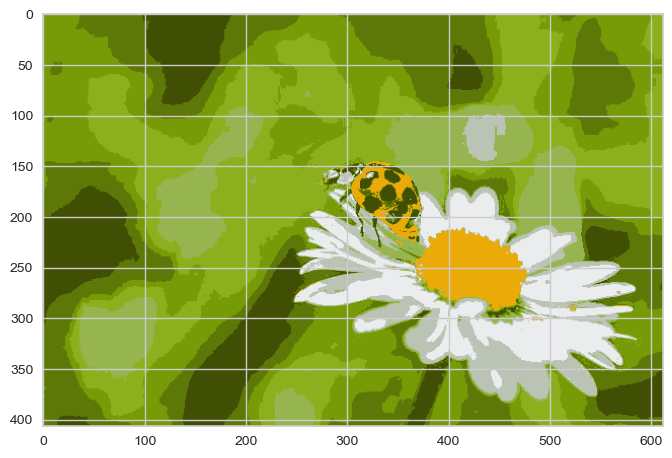

In [24]:
plt.imshow(segmented_img); # 색상이 단순화 됨

In [25]:
# 여러개의 군집을 비교

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=13).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape).astype(int))


c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

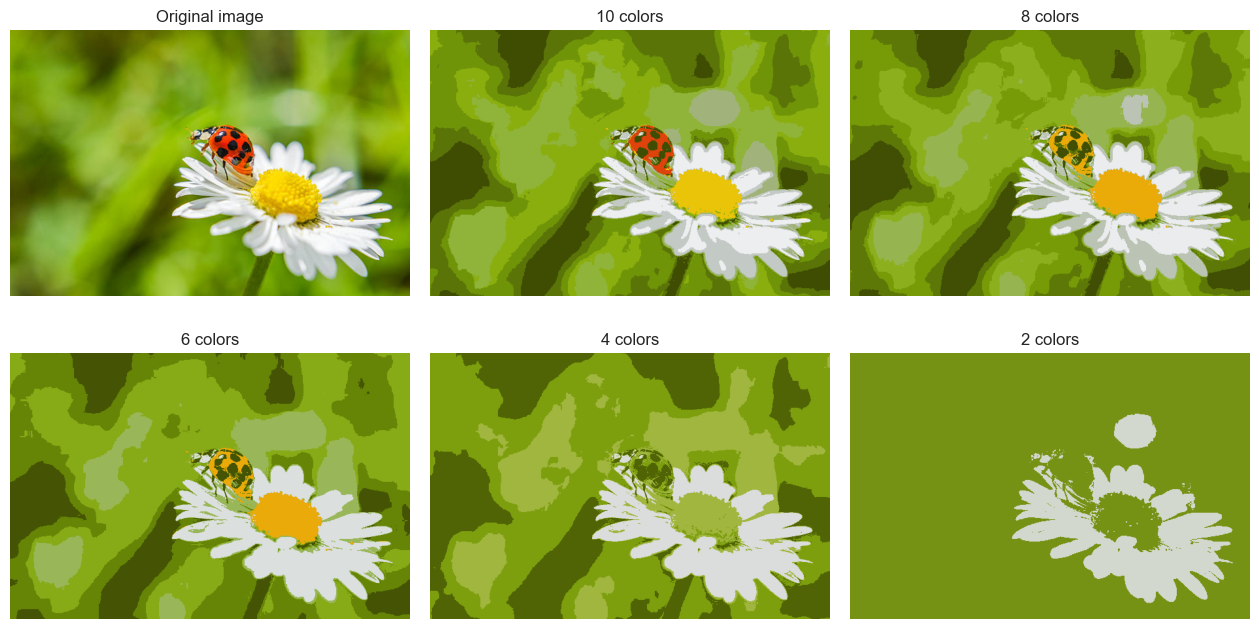

In [26]:
# 모든 결과 시각화

plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_clusters))
    plt.axis('off')

plt.show()